![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [67]:
def load_data(fn_subject, fn_x, fn_export):

  df_features = pd.read_csv('features.txt', delimiter='\s+', header=None)
  df_subject = pd.read_csv(fn_subject, delimiter='\s+', header=None)
  df_x = pd.read_csv(fn_x, delimiter='\s+', header=None)

  df_x.columns = df_features[1]
  df_x['subject_id'] = df_subject[0]

  df_x = df_x.reset_index()
  df_x = df_x.set_index(['index', 'subject_id'])

  return df_x

# os indices das colunas com as melhores variaveis
df_best_features = [40, 393, 559]

df_x_train = load_data('subject_train.txt', 'X_train.txt', 'df_x_train.csv').iloc[:,df_best_features]
df_y_train = pd.read_csv('y_train.txt', delimiter='\s+', header=None)

df_x_test = load_data('subject_test.txt', 'X_test.txt', 'df_x_test.csv').iloc[:,df_best_features]
df_y_test = pd.read_csv('y_test.txt', delimiter='\s+', header=None)

#verificando com exercicio 2
#df_x_train.loc[df_x_train.index.get_level_values('index') == 3229]
df_x_train

,1,tGravityAcc-mean()-X,"fBodyAccJerk-bandsEnergy()-1,24","angle(Y,gravityMean)"
index,subject_id,,,
0,1,0.963396,-0.999981,0.179941
1,1,0.966561,-0.999974,0.180289
2,1,0.966878,-0.999909,0.180637
3,1,0.967615,-0.999927,0.181935
4,1,0.968224,-0.999975,0.185151
...,...,...,...,...
7347,30,0.923148,-0.724214,0.238604
7348,30,0.918343,-0.767363,0.252676
7349,30,0.919810,-0.757269,0.249145


### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [68]:
%%time
clf = DecisionTreeClassifier(random_state=1000, min_samples_leaf=20)
path = clf.cost_complexity_pruning_path(df_x_train, df_y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

CPU times: user 24.9 ms, sys: 0 ns, total: 24.9 ms
Wall time: 25 ms


array([0.00000000e+00, 5.44995104e-06, 5.73823449e-06, 6.59966132e-06,
       6.96674540e-06, 7.12472149e-06, 7.50826033e-06, 8.23946945e-06,
       8.46330553e-06, 1.04605917e-05, 1.08934148e-05, 1.13347842e-05,
       1.19905305e-05, 1.23595729e-05, 1.42961242e-05, 2.20048389e-05,
       2.91013994e-05, 2.94704389e-05, 3.07517623e-05, 3.17373957e-05,
       3.17373957e-05, 3.74047878e-05, 4.54351696e-05, 4.64103361e-05,
       4.85876625e-05, 5.47308151e-05, 7.56500873e-05, 8.42012540e-05,
       8.88760179e-05, 9.21188146e-05, 9.53041198e-05, 9.76852310e-05,
       9.95342357e-05, 1.11080885e-04, 1.11856423e-04, 1.42364889e-04,
       1.48657412e-04, 1.48821476e-04, 1.52216806e-04, 1.63220892e-04,
       1.71258285e-04, 1.78922387e-04, 1.81158152e-04, 1.86284714e-04,
       2.01596478e-04, 2.10268460e-04, 2.21939830e-04, 2.36266759e-04,
       2.65253663e-04, 2.66087739e-04, 2.85831802e-04, 2.89776222e-04,
       2.99307199e-04, 3.00529208e-04, 3.01137746e-04, 3.07128490e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [69]:
%%time
grid_params = {'ccp_alpha': ccp_alphas}
grid = GridSearchCV(estimator=clf, param_grid=grid_params, cv=10)
grid.fit(df_x_train, df_y_train)

CPU times: user 32.1 s, sys: 66 ms, total: 32.2 s
Wall time: 32.4 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=1000),
             param_grid={'ccp_alpha': array([0.00000000e+00, 5.44995104e-06, 5.73823449e-06, 6.59966132e-06,
       6.96674540e-06, 7.12472149e-06, 7.50826033e-06, 8.23946945e-06,
       8.46330553e-06, 1.04605917e-05, 1.08934148e-05, 1.13347842e-05,
       1.19905305e-05, 1.23595729e-05, 1.42961242e-05, 2.2...
       1.80679135e-03, 1.81536232e-03, 1.85203504e-03, 1.87212391e-03,
       1.93520433e-03, 2.01517534e-03, 2.11510258e-03, 2.28266048e-03,
       2.30144574e-03, 2.91616380e-03, 2.92868059e-03, 3.17131733e-03,
       3.27137930e-03, 3.28271577e-03, 4.24854055e-03, 4.35846055e-03,
       4.38002059e-03, 7.11283714e-03, 8.24712763e-03, 1.24551166e-02,
       3.51726117e-02, 4.67250302e-02, 1.09327768e-01, 1.67217273e-01,
       1.85974665e-01])})

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [70]:
clf = DecisionTreeClassifier(random_state=1000, ccp_alpha=grid.best_params_['ccp_alpha']).fit(df_x_train, df_y_train)
clf_score = clf.score(df_x_test, df_y_test)
print(f'Acurácia da melhor árvore na base de testes: {clf_score*100:.2f}')

Acurácia da melhor árvore na base de testes: 69.94


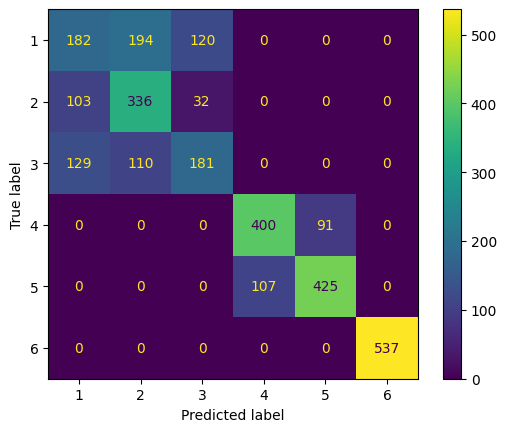

In [71]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=df_x_test, y=df_y_test)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [72]:
df_x_train_base_c3 = load_data('subject_train.txt', 'X_train.txt', 'df_x_train.csv')
df_y_train_base_c3 = pd.read_csv('y_train.txt', delimiter='\s+', header=None)

df_x_test_base_c3 = load_data('subject_test.txt', 'X_test.txt', 'df_x_test.csv')
df_y_test_base_c3 = pd.read_csv('y_test.txt', delimiter='\s+', header=None)


Pela confusion matrix, noto que
- a classe 6 acertou todas
- as classes 4 e 5 apresentam acurácia maior, mas valores preditos se confundem entre elas
- as classes 1, 2 e 3 apresentam acurária menor, e os valores preditos se confundem entre elas

Nota: há um método para calcular a acurácia para cada classe?

In [73]:
df_x_train_c3 = df_x_train_base_c3
df_y_train_c3 = (df_y_train_base_c3 == 3)
df_y_train_c3.columns = ['is_class_3']
df_y_train_c3['is_class_3']=df_y_train_c3['is_class_3'].astype(int)
df_y_train_c3.value_counts(subset='is_class_3')

is_class_3
0    6366
1     986
dtype: int64

In [74]:
df_x_test_c3 = df_x_test_base_c3
df_y_test_c3 = (df_y_test_base_c3 == 3)
df_y_test_c3.columns = ['is_class_3']
df_y_test_c3['is_class_3']=df_y_test_c3['is_class_3'].astype(int)
df_y_test_c3.value_counts(subset='is_class_3')

is_class_3
0    2527
1     420
dtype: int64

In [75]:
clf_ccp_alpha_c3 = DecisionTreeClassifier(random_state=2000, min_samples_leaf=20, max_depth=4)
path_c3 = clf_ccp_alpha_c3.cost_complexity_pruning_path(df_x_train, df_y_train)
ccp_alphas_c3 = path_c3.ccp_alphas

In [78]:
clfs_c3 = []
for ccp_alpha_c3 in ccp_alphas_c3:
    clf_c3 = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha_c3).fit(df_x_train_c3, df_y_train_c3)
    clfs_c3.append(clf_c3)

train_scores_c3 = [clf_c3.score(df_x_train_c3, df_y_train_c3) for clf_c3 in clfs_c3]
test_scores_c3  = [clf_c3.score(df_x_test_c3, df_y_test_c3) for clf_c3 in clfs_c3]

ind_melhor_arvore_test_c3 = len(test_scores_c3) - test_scores_c3[::-1].index(max(test_scores_c3)) - 1
melhor_arvore_c3 = clfs_c3[ind_melhor_arvore_test_c3]
print(f'Acurácia da melhor árvore para identificar classe 3 na base de teste: {test_scores_c3[ind_melhor_arvore_test_c3]*100:.2f}')

Acurácia da melhor árvore para identificar classe 3 na base de teste: 94.94
